## Import The Necessary Libraries

In [28]:
import re
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

## Get Gas Data

In [3]:
gas = pd.read_csv('data/gas_prices.csv')
gas.sample(5)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
14,2004,2.72,2.37,4.99,5.24,5.29,3.93,2.03,4.51,5.56,1.88
10,2000,1.94,1.86,3.80,3.45,3.77,3.65,2.01,4.18,4.58,1.51
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
17,2007,3.85,3.59,6.60,6.88,6.73,4.49,2.40,6.21,7.13,2.80


### Line PLot

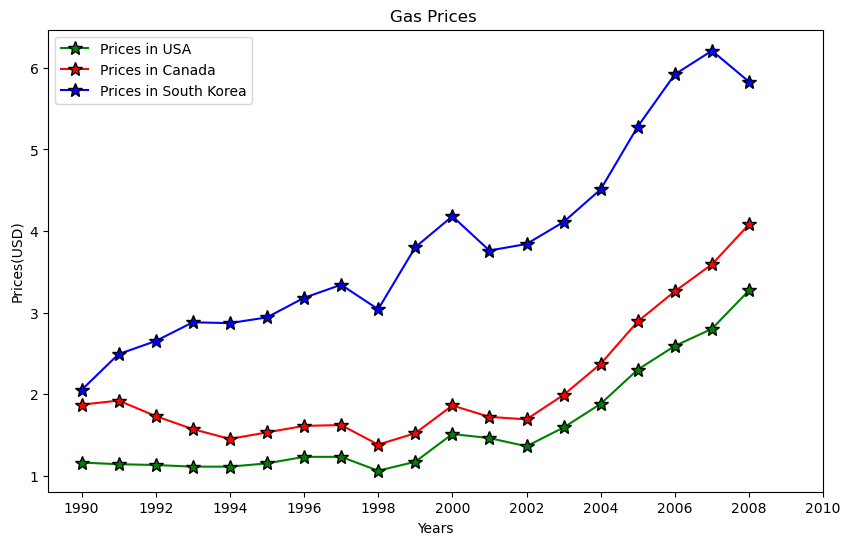

In [4]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(gas.Year,
         gas.USA,
         label = 'Prices in USA', 
         c='g', marker='*', ms='10',
         markeredgecolor='k')
ax.plot(gas.Year, 
         gas.Canada,
         label = 'Prices in Canada', 
         c='r', marker='*', ms='10',
         markeredgecolor='k')
ax.plot(gas.Year,
         gas['South Korea'],
         label = 'Prices in South Korea',
         c='b', marker='*', ms='10',
         markeredgecolor='k')


ax.set_title('Gas Prices ')
ax.set_xlabel('Years')
ax.set_ylabel('Prices(USD)')

ax.set_xticks(gas.Year.unique()[::2].tolist() + [2010])

ax.legend()
plt.show()

In [5]:
fig.savefig('Gas_Prices_USA_Canada_SouthKorea.png')

In [6]:
gas.columns[1:]

Index(['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'Mexico',
       'South Korea', 'UK', 'USA'],
      dtype='object')

## Get FIFA Data

In [7]:
fifa = pd.read_csv('data/fifa_data.csv', index_col = 0)
fifa.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7072,201841,N. Dussenne,26,https://cdn.sofifa.org/players/4/19/201841.png,Belgium,https://cdn.sofifa.org/flags/7.png,68,71,Royal Excel Mouscron,https://cdn.sofifa.org/teams/2/light/111560.png,€925K,€5K,1452,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RCB,2.0,"Aug 17, 2018",NaN,2020,6'3,187lbs,45+2,45+2,45+2,41+2,42+2,42+2,42+2,41+2,43+2,43+2,43+2,43+2,49+2,49+2,49+2,43+2,56+2,62+2,62+2,62+2,56+2,59+2,67+2,67+2,67+2,59+2,41.0,28.0,76.0,57.0,56.0,35.0,28.0,29.0,49.0,52.0,37.0,32.0,58.0,66.0,43.0,50.0,41.0,62.0,79.0,21.0,70.0,68.0,28.0,40.0,40.0,69.0,70.0,69.0,66.0,12.0,16.0,15.0,7.0,11.0,€1.4M
6979,244315,B. Boulahroud,25,https://cdn.sofifa.org/players/4/19/244315.png,Morocco,https://cdn.sofifa.org/flags/129.png,68,73,Málaga CF,https://cdn.sofifa.org/teams/2/light/573.png,€1.2M,€4K,1771,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CM,14.0,"Jul 6, 2018",NaN,2021,5'9,161lbs,61+2,61+2,61+2,64+2,64+2,64+2,64+2,64+2,66+2,66+2,66+2,64+2,66+2,66+2,66+2,64+2,64+2,66+2,66+2,66+2,64+2,64+2,62+2,62+2,62+2,64+2,50.0,58.0,49.0,73.0,45.0,65.0,49.0,52.0,70.0,72.0,72.0,70.0,66.0,57.0,65.0,59.0,64.0,62.0,62.0,59.0,53.0,63.0,59.0,66.0,55.0,49.0,66.0,67.0,66.0,10.0,13.0,13.0,12.0,9.0,€2M
6324,205753,E. Salli,25,https://cdn.sofifa.org/players/4/19/205753.png,Cameroon,https://cdn.sofifa.org/flags/103.png,69,70,1. FC Nürnberg,https://cdn.sofifa.org/teams/2/light/171.png,€1.2M,€11K,1759,Right,1.0,4.0,4.0,Medium/ Medium,Normal,No,LM,7.0,"Jul 21, 2016",NaN,2019,5'7,157lbs,67+2,67+2,67+2,69+2,68+2,68+2,68+2,69+2,66+2,66+2,66+2,67+2,59+2,59+2,59+2,67+2,51+2,47+2,47+2,47+2,51+2,49+2,44+2,44+2,44+2,49+2,60.0,64.0,63.0,61.0,59.0,74.0,64.0,48.0,48.0,70.0,89.0,87.0,83.0,62.0,93.0,68.0,73.0,68.0,61.0,62.0,62.0,22.0,65.0,62.0,58.0,67.0,29.0,31.0,22.0,7.0,10.0,13.0,8.0,13.0,€2.3M
5882,229702,J. Mees,22,https://cdn.sofifa.org/players/4/19/229702.png,Germany,https://cdn.sofifa.org/flags/21.png,69,78,1. FC Union Berlin,https://cdn.sofifa.org/teams/2/light/1831.png,€1.6M,€14K,1657,Right,1.0,4.0,3.0,Medium/ Medium,Lean,No,LW,8.0,"Jul 1, 2018",NaN,2021,5'11,161lbs,65+2,65+2,65+2,68+2,68+2,68+2,68+2,68+2,68+2,68+2,68+2,67+2,60+2,60+2,60+2,67+2,47+2,44+2,44+2,44+2,47+2,43+2,36+2,36+2,36+2,43+2,59.0,70.0,48.0,67.0,64.0,73.0,66.0,45.0,54.0,69.0,77.0,70.0,76.0,64.0,75.0,67.0,67.0,66.0,57.0,66.0,49.0,17.0,67.0,66.0,58.0,63.0,18.0,19.0,15.0,11.0,14.0,7.0,7.0,9.0,€2.9M
12661,144024,D. Zibung,34,https://cdn.sofifa.org/players/4/19/144024.png,Switzerland,https://cdn.sofifa.org/flags/47.png,63,63,FC Luzern,https://cdn.sofifa.org/teams/2/light/897.png,€150K,€2K,1076,Right,1.0,2.0,1.0,Medium/ Medium,Stocky,No,GK,1.0,"Jul 1, 2003",NaN,2019,6'2,185lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,9.0,11.0,37.0,9.0,14.0,13.0,13.0,35.0,26.0,27.0,30.0,57.0,60.0,45.0,38.0,56.0,27.0,57.0,16.0,31.0,14.0,14.0,51.0,26.0,56.0,11.0,11.0,19.0,65.0,60.0,53.0,62.0,65.0,€218K


### Histogram

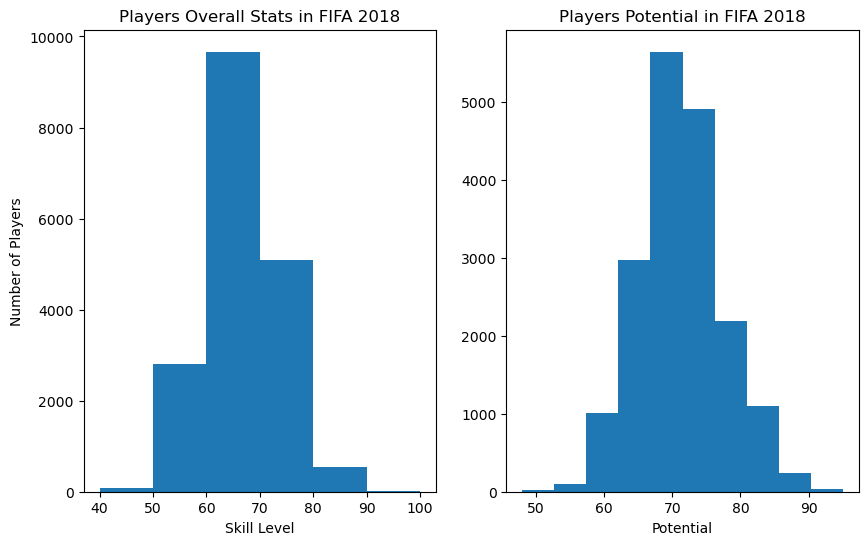

In [27]:
bins = [40, 50, 60, 70, 80, 90, 100]

fig1, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
ax1.hist(fifa.Overall, bins = bins)

ax1.set_title('Players Overall Stats in FIFA 2018')
ax1.set_xlabel('Skill Level')
ax1.set_ylabel('Number of Players')

ax1.set_xticks(bins)

ax2.hist(fifa.Potential)
ax2.set_title('Players Potential in FIFA 2018')
ax2.set_xlabel('Potential')
# ax2.set_ylabel('Number of Players')


plt.show()

In [21]:
def get_float_price(row):
    pattern = r'[0-9,.]+'
    x = re.search(pattern, row).group(0)
    x = float(x)
    return x

fifa[]

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

## Pie Chart

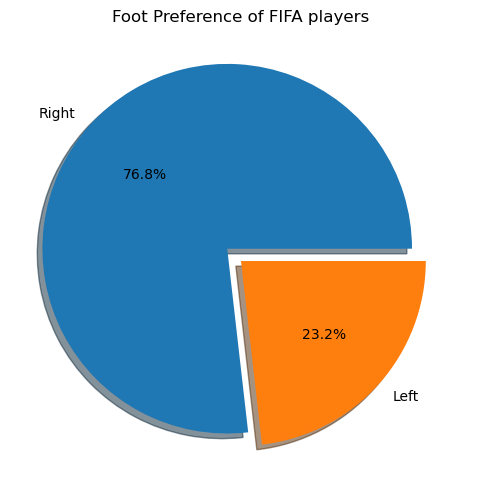

In [45]:
p_foot_counts = fifa['Preferred Foot'].value_counts()

fig3, ax3 = plt.subplots(figsize = (10, 6))
ax3.pie(p_foot_counts, 
        labels = ['Right', 'Left'], 
        autopct='%1.1f%%', 
        explode = [0.1, 0], 
        shadow = True)
plt.title('Foot Preference of FIFA players')
plt.show()

## Box Chart

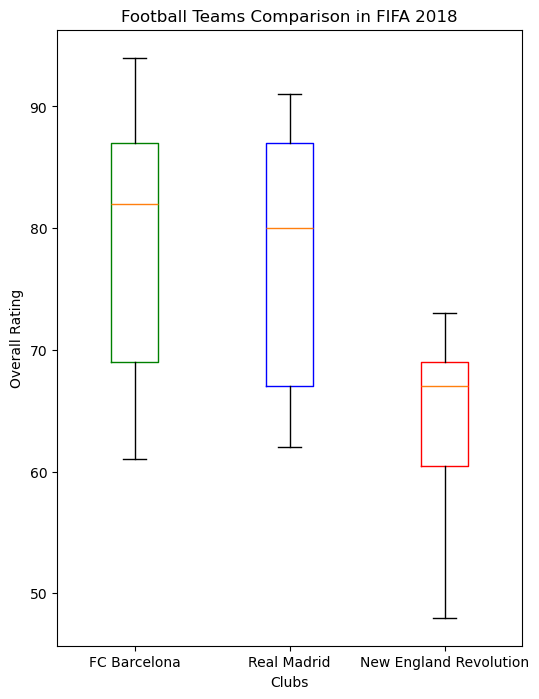

In [74]:
barca = fifa[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa[fifa.Club == 'Real Madrid']['Overall']
revs = fifa[fifa.Club == 'New England Revolution']['Overall']

fig4, ax4 = plt.subplots(figsize = (6,8))

labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']
boxes = ax4.boxplot([barca, madrid, revs], labels = labels)

colors = ['green', 'blue', 'red']

for i, box in enumerate(boxes['boxes']):
    box.set(color = colors[i])
    
ax4.set_title('Football Teams Comparison in FIFA 2018')
ax4.set_xlabel('Clubs')
ax4.set_ylabel('Overall Rating')

plt.show()

In [63]:
for box in boxes:
    print(box)

whiskers
caps
boxes
medians
fliers
means
